In [1]:
import pandas as pd
from codecs import open
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Read the entire collection

In [2]:
# function to read documents
def read_documents(doc_file):
    docs = []
    labels = []
    with open(doc_file, encoding='utf-8') as f:
        for line in f:
            words = line.strip().split(" ")
            labels.append(words[1])
            docs.append(' '.join(line.split(" ")[3:]))
    return docs, labels

In [3]:
# Read the reviews document
all_docs, all_labels = read_documents('all_sentiment_shuffled.txt')
# Convert to DataFrame
df = pd.DataFrame({'labels': all_labels,
                          'docs': all_docs})
# Convert a collection of text documents to a matrix of token counts.
# Note: Stop words are words like “and”, “the”, “him”, which are presumed to be
# uninformative in representing the content of a text, and which may be removed
# to avoid them being construed as signal for prediction.
# https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words
vectorizer = CountVectorizer(stop_words='english')
# Learn the vocabulary dictionary and return document-term matrix
all_features = vectorizer.fit_transform(df.docs)

## Task 0: Split Data into Training and Evaluation

In [4]:
# Split arrays or matrices into random train and test subsets
# Use 80% for training and the remainder for evaluation
X_train, X_test, y_train, y_test = train_test_split(all_features, df.labels,
                                                    test_size=0.2, random_state=88)

## Task 1: Plot Distribution of # of Instances in each Class

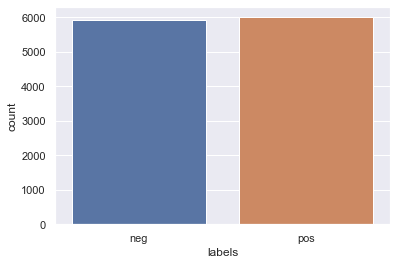

In [5]:
sns.set_theme() # Apply the default theme
sns.set_style('darkgrid') # Set Seaborn style
# Construct plot
sns.countplot(data = df, x = 'labels')
plt.show()

In [6]:
pos_len = len(df.loc[df['labels'] == 'pos'])
neg_len = len(df.loc[df['labels'] == 'neg'])
print('Number of Instances of Each Class: neg = ' + str(neg_len) + ', pos = ' + str(pos_len))

Number of Instances of Each Class: neg = 5914, pos = 6000


## Task 2: Run 3 different ML models:
### alt1) Naive Bayes Classifier (default smoothing, near optimal results)

In [7]:
clf_defnb = MultinomialNB()
clf_defnb.fit(X_train, y_train)
clf_y_pred_defnb = clf_defnb.predict(X_test)

#### - b) Confusion Matrix

In [8]:
conf_mtx_defnb = confusion_matrix(y_test, clf_y_pred_defnb)
print('Confusion Matrix:\n', conf_mtx_defnb)

Confusion Matrix:
 [[1001  196]
 [ 238  948]]


#### - c) Classification Report

In [9]:
clf_rep_defnb = classification_report(y_test, clf_y_pred_defnb)
print('Classification Report:\n', clf_rep_defnb)

Classification Report:
               precision    recall  f1-score   support

         neg       0.81      0.84      0.82      1197
         pos       0.83      0.80      0.81      1186

    accuracy                           0.82      2383
   macro avg       0.82      0.82      0.82      2383
weighted avg       0.82      0.82      0.82      2383



#### - d) Accuracy

In [10]:
clf_acc_defnb = accuracy_score(y_test, clf_y_pred_defnb)
print('Accuracy:', clf_acc_defnb)

Accuracy: 0.8178766261015527


### alt2) Naive Bayes Classifier (bad ~= 0 smoothing)

In [11]:
clf_badnb = MultinomialNB(alpha=0.0000000001)
clf_badnb.fit(X_train, y_train)
clf_y_pred_badnb = clf_badnb.predict(X_test)

#### - b) Confusion Matrix

In [12]:
conf_mtx_badnb = confusion_matrix(y_test, clf_y_pred_badnb)
print('Confusion Matrix:\n', conf_mtx_badnb)

Confusion Matrix:
 [[876 321]
 [347 839]]


#### - c) Classification Report

In [13]:
clf_rep_badnb = classification_report(y_test, clf_y_pred_badnb)
print('Classification Report:\n', clf_rep_badnb)

Classification Report:
               precision    recall  f1-score   support

         neg       0.72      0.73      0.72      1197
         pos       0.72      0.71      0.72      1186

    accuracy                           0.72      2383
   macro avg       0.72      0.72      0.72      2383
weighted avg       0.72      0.72      0.72      2383



#### - d) Accuracy

In [14]:
clf_acc_badnb = accuracy_score(y_test, clf_y_pred_badnb)
print('Accuracy:', clf_acc_badnb)

Accuracy: 0.7196810742761225


### a) Naive Bayes Classifier (optimal = 5 smoothing)

In [15]:
clf_optnb = MultinomialNB(alpha=5)
clf_optnb.fit(X_train, y_train)
clf_y_pred_optnb = clf_optnb.predict(X_test)

### b) Base Decision Tree

In [16]:
clf_basetree = DecisionTreeClassifier()
clf_basetree.fit(X_train, y_train)
clf_y_pred_basetree = clf_basetree.predict(X_test)

### c) Best Decision Tree - GridSearch for Best Parameters

In [17]:
# TESTED PARAMETERS:
# Most parameters caused no gain from defaults.
# Only criterion & splitter non-defaults increase results.
# (criterion default=”gini”, splitter default=”best”)
'''tree_param = {'criterion':['gini','entropy'],
             'splitter':['random','best'], # Best: default = ”best”
             'max_depth':range(1,10), # Best: default = None
             'min_samples_split':range(2,10), # Best: default = 2
             'min_samples_leaf':range(1,5), # Best: default = 1
             }'''

"tree_param = {'criterion':['gini','entropy'],\n             'splitter':['random','best'], # Best: default = ”best”\n             'max_depth':range(1,10), # Best: default = None\n             'min_samples_split':range(2,10), # Best: default = 2\n             'min_samples_leaf':range(1,5), # Best: default = 1\n             }"

In [18]:
tree_param = {'criterion':['gini','entropy'],
             'splitter':['random','best'],
             }
clf_testtree = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=tree_param,
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

In [19]:
clf_testtree.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    9.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    9.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['random', 'best']},
             verbose=1)

In [20]:
clf_testtree.best_score_

0.720385986130515

In [21]:
clf_testtree.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

### c) Best Decision Tree

In [22]:
clf_besttree = clf_testtree.best_estimator_
clf_besttree.fit(X_train, y_train)
clf_y_pred_besttree = clf_besttree.predict(X_test)

## Task 3: Output to Files:
#### - a) Row Number of Instance, Index of Predicted Class
#### - b) Confusion Matrix
#### - c) Classification Report
#### - d) Accuracy

In [23]:
def write_to_file (filename, preds, con_mx, class_report, acc):
    i = 0
    out = 'a) Row Number of Instance, Index of Predicted Class\n'
    for pred in preds:
        out += str(i) + ", " + pred +'\n'
        i += 1
    out += '\nb) Confusion Matrix\n'
    out += str(con_mx)
    out += '\n\nc) Classification Report\n'
    out += str(class_report)
    out += '\nd) Accuracy\n'
    out += str(acc)
    with open(filename, 'w') as f:
        f.write(out)

In [24]:
# Generate Optimal Naive Bayes Metrics
clf_mtx_optnb = confusion_matrix(y_test, clf_y_pred_optnb)
clf_rep_optnb = classification_report(y_test, clf_y_pred_optnb)
clf_acc_optnb = accuracy_score(y_test, clf_y_pred_optnb)
# Generate Base-DT Metrics
clf_mtx_basetree = confusion_matrix(y_test, clf_y_pred_basetree)
clf_rep_basetree = classification_report(y_test, clf_y_pred_basetree)
clf_acc_basetree = accuracy_score(y_test, clf_y_pred_basetree)
# Generate Best-DT Metrics
clf_mtx_besttree = confusion_matrix(y_test, clf_y_pred_besttree)
clf_rep_besttree = classification_report(y_test, clf_y_pred_besttree)
clf_acc_besttree = accuracy_score(y_test, clf_y_pred_besttree)

In [25]:
# MultinomialNB Write to File
write_to_file("MultinomialNB-Reviews.txt", clf_y_pred_optnb, clf_mtx_optnb, clf_rep_optnb, clf_acc_optnb)

In [26]:
# Base-DT Write to File
write_to_file("Base-DT-Reviews.txt", clf_y_pred_basetree, clf_mtx_basetree, clf_rep_basetree, clf_acc_basetree)

In [27]:
# Best-DT Write to File
write_to_file("Best-DT-Reviews.txt", clf_y_pred_besttree, clf_mtx_besttree, clf_rep_besttree, clf_acc_besttree)

## Task 4: Error Analysis

#### Smoothing value for Naive Bayes classifier
Setting the smoothing to a near-zero value results in a f1 score of 0.71. As the smoothing value increases (up to 1),
the score goes up to 0.83.

This is due to the data set for validation likely containing words that aren't in the training set,
and without a smoothing value it results in a 0% probability for that word being in any of the labels.

#### The entropy parameter worked best for the decision tree
The gini criterion is much faster because it is less computationally expensive.
However, the obtained results using the entropy criterion are slightly better.
As the results are so similar, it does not seem to be worth the time invested in training when using the entropy criterion.

#### The random parameter worked best for the decision tree
Setting the splitter for the decision tree to randomly choose the most important features instead of deciding which
are the most imported yielded more precise results with the validation set.

This could be due to the 'best' splitter method causing some overfitting with the model, in which the model arranged
the tree in a way that made it unable to generalize the data to unseen sets.

In [28]:
# split results again but on docs, to get a list of test docs
X_train_doc, X_test_doc, y_train_doc, y_test_doc = train_test_split(all_features, df.docs,
                                                    test_size=0.2, random_state=88)

In [33]:
# Uncomment to show Wrong Predictions
'''
for row_index, (doc, inpt, prediction, label) in enumerate(zip (y_test_doc, X_test, clf_y_pred_optnb, y_test)):
  if prediction != label:
    print('Row', row_index, 'has been classified as', prediction, 'and should be', label)
    print(doc)
'''

"\nfor row_index, (doc, inpt, prediction, label) in enumerate(zip (y_test_doc, X_test, clf_y_pred_optnb, y_test)):\n  if prediction != label:\n    print('Row', row_index, 'has been classified as', prediction, 'and should be', label)\n    print(doc)\n"

### Incorrect Row Classification Examples
#### Row 1563 has been classified as neg and should be pos
'i found i did enjoy this movie , even though the director took liberties . it does n't follow so much the novel by jane austen , but if you have n't read the book and are unable to do the comparisons , this movie is enjoyable . i gave 4 stars because of the liberties taken by the director , but did like what i saw'

This is a positive review which includes a healthy amount of the negatives that the reviewer had, despite overall being positive on the movie.

#### Row 89 has been classified as pos and should be neg
'it 's loud . you ca n't hear the lyrics nor the words . just a lot of loud noise . great if you want to damage your hearing'

This is clearly an example is misclassifying sarcasm as positive when it's clearly negative to a human reader.

#### Row 2022 has been classified as neg and should be pos

'la pelicula es mas o menos , pero la banda sonora es buena , en especial la cancion #1 crush de garbage , es una excelente cancion.. .'

This result is perhaps due to the lack of Spanish examples to train upon leading to inaccuracy. Additionally, the review discusses the song titled "Garbage", which could lead to negative results.

#### Row 185 has been classified as pos and should be neg

'i love this band and have all the rest of their cds '

It's possible the review has been mislabeled, such as the reviewer misclicking Negative when he meant to give it a Positive score. Even a human would understand this review as a positive comment, after all.